Plotting Night Data...


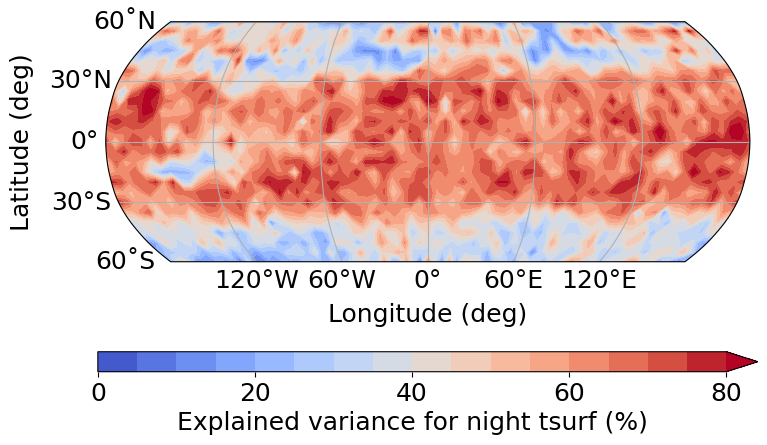

Plotting Day Data...


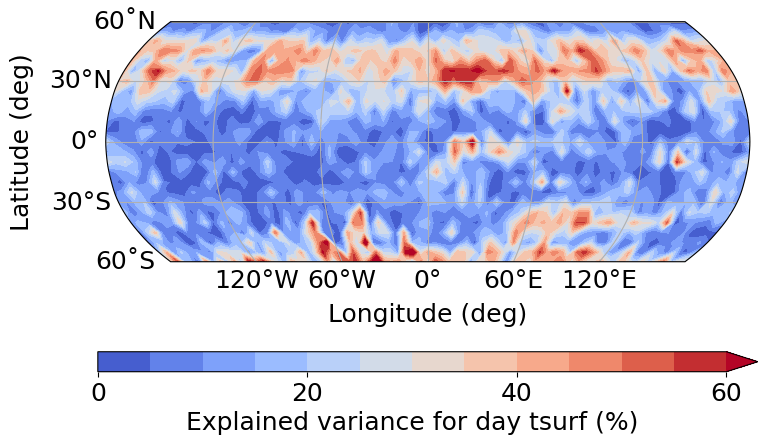

In [ ]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib as mpl
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# --- Configuration ---
FILE_PATH = '../data/frac_explained_day_night.nc'
LAT_BOUNDS = slice(-60, 60)
LON_BOUNDS = slice(-180., 180.)

def add_styled_axes(fig, pos, title=''):
    """
    Adds a Robinson projection axis with specific formatting instructions.
    """
    ax = fig.add_axes(pos, projection=ccrs.Robinson())
    
    # Gridlines setup
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.xlabel_style = {'size': 18}
    gl.ylabel_style = {'size': 18}
    gl.xlocator = mticker.FixedLocator(np.arange(-120, 180, 60))
    gl.ylocator = mticker.FixedLocator(np.arange(-60, 61, 30))

    # Manual labels
    ax.text(0.03, 1.0, '60˚N', ha='center', va='center', transform=ax.transAxes, fontsize=18)
    ax.text(0.03, 0.0, '60˚S', ha='center', va='center', transform=ax.transAxes, fontsize=18)
    ax.text(0.5, -0.22, 'Longitude (deg)', ha='center', va='center', transform=ax.transAxes, fontsize=18)
    ax.text(-0.13, 0.5, 'Latitude (deg)', ha='center', va='center', transform=ax.transAxes, fontsize=18, rotation='vertical')

    # Tick parameters
    ax.tick_params('both', which='both', top=False, right=False, labelsize=18)
    ax.set_title(title, loc='center', fontdict={'fontsize': 18})
    
    return ax

def plot_coverage_map(data_array, levels, cbar_label, cbar_ticks):
    """
    Plots the map and colorbar for a specific data array.
    """
    # Create Figure
    fig = plt.figure(figsize=(20, 20))

    # Prepare Data (Cyclic point)
    # Subset lat/lon based on bounds defined at top
    lon_subset = data_array['Lon'].loc[LON_BOUNDS]
    lat_subset = data_array['Lat'].loc[LAT_BOUNDS]
    data_subset = data_array.loc[dict(Lat=LAT_BOUNDS, Lon=LON_BOUNDS)]
    
    cycle_slope, cycle_lon = add_cyclic_point(data_subset, coord=lon_subset)

    # Add Axes
    # Note: Using exact position from original code
    ax1 = add_styled_axes(fig, [0.12, 0.70, 0.4, 0.12], '')

    # Contourf Settings
    contourf_kw = dict(
        transform=ccrs.PlateCarree(),
        levels=levels,
        cmap=mpl.cm.coolwarm,
        add_colorbar=False,
        add_labels=False,
        vmin=levels[0],
        vmax=levels[-1],
        extend='max',
        zorder=0
    )

    # Plot Contour
    c1 = ax1.contourf(cycle_lon, lat_subset, cycle_slope, **contourf_kw)

    # Add Colorbar
    # Note: Using exact position from original code
    position = fig.add_axes([0.155, 0.645, 0.33, 0.01])
    cbar = fig.colorbar(c1, cax=position, orientation='horizontal', format='%.1f')
    
    # Configure Colorbar Ticks
    # Original code set ticks every 10, but labeled every 20. 
    # Logic preserved below:
    cbar.ax.set_xticks(cbar_ticks['all']) 
    xlabels = [f'{x:1.0f}' for x in cbar_ticks['labels']]
    cbar.ax.set_xticks(cbar_ticks['labels'], labels=xlabels)
    
    cbar.ax.set_xlabel(cbar_label, fontsize=18)
    plt.setp(cbar.ax.get_xticklabels(), fontsize=18)

    plt.show()


ds = xr.open_dataset(FILE_PATH)

# --- Plot 1: Night Data ---
print("Plotting Night Data...")
plot_coverage_map(
    data_array=ds['frac_explained_night'],
    levels=np.arange(0, 81, 5),
    cbar_label='Explained variance for night tsurf (%)',
    cbar_ticks={'all': np.arange(0, 81, 10), 'labels': np.arange(0, 81, 20)}
)

# --- Plot 2: Day Data ---
print("Plotting Day Data...")
plot_coverage_map(
    data_array=ds['frac_explained_day'],
    levels=np.arange(0, 61, 5),
    cbar_label='Explained variance for day tsurf (%)',
    cbar_ticks={'all': np.arange(0, 61, 10), 'labels': np.arange(0, 61, 20)}
    )
